![example](images/director_shot.jpeg)

# Making a Successful Movie

**Author:** Laura Brown
***

## Overview

The success of a movie can be measure in different ways, but it typically depends on a combination of factors. A successful movie is one that resonates with audiences, receives critical acclaim, and generates substantial revenue. A movie that earns high box office revenue is generally considered successful because it indicates that the movie was well-received by audiences and generated significant interest. But what is the typical budgets of movies that are considered "successful"? What time of year are people most likely to see a movie? There are many factors that determine the success of a movie but by using descriptive analysis we can establish what will increase any movie’s chance for success.

## Business Problem

Given information about movies that have previously been released, we want to know what factors we can pinpoint that will increase our chance for financial success in the cinematic space. The most important being, when people are most likely to go see a movie in theaters, what movies budgets typically have a high Return of Investment and what genre on average generates the most domestic gross revenue. There are other factors that can determine the success of a movie but when entering the movie production space, Microsoft should be most concerned with the financial aspects to establish themselves amongst those already dominating the field.  


## Data Understanding

The data I am using to perform this analysis is from IMDB, the most robust website/database when it comes to information about movies. I am going to take each movie’s domestic gross and combined it with other tables to see how it is correlates to these other important aspects of a movie. By looking at each movies release date, its genre and how much each movie spent on creating it, I will be able to answer important questions in regards with how to have the highest possible chance of a successful movie.

## Data Exploration

First, I imported all of the necessiary libraries I will need for this analysis. I want to be able to take a look at all of the files provided and find the important information we need to ulitmately answer the business question. Once I find information I can use, I will then join tables together in a meaningful way, and clean up and filter out data I do not need. 

In [1]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as sns  
from glob import glob
import os


%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
moviegross = pd.read_csv("data/bom.movie_gross.csv.gz")
moviegross.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [3]:
moviegross.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [4]:
import sqlite3

In [5]:
connection = sqlite3.connect("data/im.db")
cursor = connection.cursor()

In [6]:
sql_query = """SELECT name FROM sqlite_master WHERE type='table';"""
cursor.execute(sql_query)
print(cursor.fetchall())

[('movie_basics',), ('directors',), ('known_for',), ('movie_akas',), ('movie_ratings',), ('persons',), ('principals',), ('writers',)]


In [7]:
movie_basics = pd.read_sql("""
SELECT *
FROM movie_basics;""", connection)
movie_basics.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [8]:
known_for = pd.read_sql("""
SELECT *
FROM known_for;""", connection)
known_for.head()

,person_id,movie_id
0,nm0061671,tt0837562
1,nm0061671,tt2398241
2,nm0061671,tt0844471
3,nm0061671,tt0118553
4,nm0061865,tt0896534


In [9]:
directors = pd.read_sql("""
SELECT *
FROM directors;""", connection)
directors.head()

,movie_id,person_id
0,tt0285252,nm0899854
1,tt0462036,nm1940585
2,tt0835418,nm0151540
3,tt0835418,nm0151540
4,tt0878654,nm0089502


In [10]:
movie_ratings = pd.read_sql("""
SELECT *
FROM movie_ratings;""", connection)
movie_ratings.head()

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


In [11]:
movie_akas = pd.read_sql("""
SELECT *
FROM movie_akas;""", connection)
movie_akas.head()

,movie_id,ordering,title,region,language,types,attributes,is_original_title
0,tt0369610,10,Джурасик свят,BG,bg,None,None,0.0
1,tt0369610,11,Jurashikku warudo,JP,None,imdbDisplay,None,0.0
2,tt0369610,12,Jurassic World: O Mundo dos Dinossauros,BR,None,imdbDisplay,None,0.0
3,tt0369610,13,O Mundo dos Dinossauros,BR,None,None,short title,0.0
4,tt0369610,14,Jurassic World,FR,None,imdbDisplay,None,0.0


In [12]:
principals = pd.read_sql("""
SELECT *
FROM principals;""", connection)
principals.head()

,movie_id,ordering,person_id,category,job,characters
0,tt0111414,1,nm0246005,actor,None,"[""The Man""]"
1,tt0111414,2,nm0398271,director,None,None
2,tt0111414,3,nm3739909,producer,producer,None
3,tt0323808,10,nm0059247,editor,None,None
4,tt0323808,1,nm3579312,actress,None,"[""Beth Boothby""]"


In [13]:
budgets = pd.read_csv("data/tn.movie_budgets.csv.gz")
budgets.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [14]:
budgets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


In [15]:
budgets['production_budget'].isin(['?', '#', 'NaN', 'null', 'N/A', '-']).any()

False

In [16]:
budgets['production_budget'].describe()

count            5782
unique            509
top       $20,000,000
freq              231
Name: production_budget, dtype: object

In [17]:
movie_info = pd.read_csv('data/rt.movie_info.tsv.gz', sep='\t')
movie_info

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
1555,1996,Forget terrorists or hijackers -- there's a ha...,R,Action and Adventure|Horror|Mystery and Suspense,NaN,NaN,"Aug 18, 2006","Jan 2, 2007",$,"33,886,034",106 minutes,New Line Cinema
1556,1997,The popular Saturday Night Live sketch was exp...,PG,Comedy|Science Fiction and Fantasy,Steve Barron,Terry Turner|Tom Davis|Dan Aykroyd|Bonnie Turner,"Jul 23, 1993","Apr 17, 2001",NaN,NaN,88 minutes,Paramount Vantage
1557,1998,"Based on a novel by Richard Powell, when the l...",G,Classics|Comedy|Drama|Musical and Performing Arts,Gordon Douglas,NaN,"Jan 1, 1962","May 11, 2004",NaN,NaN,111 minutes,NaN
1558,1999,The Sandlot is a coming-of-age story about a g...,PG,Comedy|Drama|Kids and Family|Sports and Fitness,David Mickey Evans,David Mickey Evans|Robert Gunter,"Apr 1, 1993","Jan 29, 2002",NaN,NaN,101 minutes,NaN


In [18]:
tmdb_movies = pd.read_csv('data/tmdb.movies.csv.gz')
tmdb_movies = tmdb_movies.sort_values('popularity', ascending=False)
tmdb_movies.head()

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
23811,23811,"[12, 28, 14]",299536,en,Avengers: Infinity War,80.773,2018-04-27,Avengers: Infinity War,8.3,13948
11019,11019,"[28, 53]",245891,en,John Wick,78.123,2014-10-24,John Wick,7.2,10081
23812,23812,"[28, 12, 16, 878, 35]",324857,en,Spider-Man: Into the Spider-Verse,60.534,2018-12-14,Spider-Man: Into the Spider-Verse,8.4,4048
11020,11020,"[28, 12, 14]",122917,en,The Hobbit: The Battle of the Five Armies,53.783,2014-12-17,The Hobbit: The Battle of the Five Armies,7.3,8392
5179,5179,"[878, 28, 12]",24428,en,The Avengers,50.289,2012-05-04,The Avengers,7.6,19673


In [19]:
rt_review=pd.read_csv('data/rt.reviews.tsv.gz',sep='\t', encoding='latin_1') 
rt_review.head()

,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
2,3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
4,3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017"


## Data Preparation

The first thing I want to consider is what genre of movie typically has the highest domestic gross value. First, I want to join the "movie_basics" table and the "movie_ratings" table based on the 'movie_id" column, that way I can have the genre and the title of that movie in the same table. 

The first thing I want to consider is what genre of movie typically has the highest domestic gross value. First, I want to join the "movie_basics" table and the "movie_ratings" table based on the 'movie_id" column, that way I can have the genre and the title of that movie in the same table. 

In [20]:
#Combining tables based on the 'movie_id' field

rating_basics = pd.merge(left= movie_basics, right= movie_ratings, on="movie_id")
rating_basics.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119


In [21]:
rating_basics.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73856 entries, 0 to 73855
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   movie_id         73856 non-null  object 
 1   primary_title    73856 non-null  object 
 2   original_title   73856 non-null  object 
 3   start_year       73856 non-null  int64  
 4   runtime_minutes  66236 non-null  float64
 5   genres           73052 non-null  object 
 6   averagerating    73856 non-null  float64
 7   numvotes         73856 non-null  int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 5.1+ MB


In order to join my new table "rating_basics" with "movie_gross", I need to change the column header from "primary_title" to "title".

In [22]:
#changing column name from primary title to just title

rating_basics.rename(columns = {"primary_title":"title"}, inplace = True)
rating_basics.head()

,movie_id,title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119


In [23]:
imdb_data = pd.merge(left=moviegross, right=rating_basics, on="title")
imdb_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3027 entries, 0 to 3026
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   title            3027 non-null   object 
 1   studio           3024 non-null   object 
 2   domestic_gross   3005 non-null   float64
 3   foreign_gross    1832 non-null   object 
 4   year             3027 non-null   int64  
 5   movie_id         3027 non-null   object 
 6   original_title   3027 non-null   object 
 7   start_year       3027 non-null   int64  
 8   runtime_minutes  2980 non-null   float64
 9   genres           3020 non-null   object 
 10  averagerating    3027 non-null   float64
 11  numvotes         3027 non-null   int64  
dtypes: float64(3), int64(3), object(6)
memory usage: 307.4+ KB


In [24]:
imdb_data = imdb_data.sort_values('domestic_gross', ascending=False)
imdb_data.head(10)

,title,studio,domestic_gross,foreign_gross,year,movie_id,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
2752,Black Panther,BV,700100000.0,646900000,2018,tt1825683,Black Panther,2018,134.0,"Action,Adventure,Sci-Fi",7.3,516148
2751,Avengers: Infinity War,BV,678800000.0,"1,369.5",2018,tt4154756,Avengers: Infinity War,2018,149.0,"Action,Adventure,Sci-Fi",8.5,670926
1616,Jurassic World,Uni.,652300000.0,"1,019.4",2015,tt0369610,Jurassic World,2015,124.0,"Action,Adventure,Sci-Fi",7.0,539338
2435,Star Wars: The Last Jedi,BV,620200000.0,712400000,2017,tt2527336,Star Wars: Episode VIII - The Last Jedi,2017,152.0,"Action,Adventure,Fantasy",7.1,462903
2754,Incredibles 2,BV,608600000.0,634200000,2018,tt3606756,Incredibles 2,2018,118.0,"Action,Adventure,Animation",7.7,203510
2031,Rogue One: A Star Wars Story,BV,532200000.0,523900000,2016,tt3748528,Rogue One,2016,133.0,"Action,Adventure,Sci-Fi",7.8,478592
2032,Finding Dory,BV,486300000.0,542300000,2016,tt2277860,Finding Dory,2016,97.0,"Adventure,Animation,Comedy",7.3,213542
1618,Avengers: Age of Ultron,BV,459000000.0,946400000,2015,tt2395427,Avengers: Age of Ultron,2015,141.0,"Action,Adventure,Sci-Fi",7.3,665594
598,The Dark Knight Rises,WB,448100000.0,636800000,2012,tt1345836,The Dark Knight Rises,2012,164.0,"Action,Thriller",8.4,1387769
958,The Hunger Games: Catching Fire,LGF,424700000.0,440300000,2013,tt1951264,The Hunger Games: Catching Fire,2013,146.0,"Action,Adventure,Sci-Fi",7.5,575455


Not all of the information in this table is relevant to what I want to look at, so I am dropping the columns "foreign_gross", "original_title", "start_year", and "movie_id." This will make the table earsier to read and analyze.

In [25]:
#removing columns that are not needed for analysis

imdb_data = imdb_data.drop(["foreign_gross", "original_title", "start_year", "movie_id"], axis=1)
imdb_data.head()

,title,studio,domestic_gross,year,runtime_minutes,genres,averagerating,numvotes
2752,Black Panther,BV,700100000.0,2018,134.0,"Action,Adventure,Sci-Fi",7.3,516148
2751,Avengers: Infinity War,BV,678800000.0,2018,149.0,"Action,Adventure,Sci-Fi",8.5,670926
1616,Jurassic World,Uni.,652300000.0,2015,124.0,"Action,Adventure,Sci-Fi",7.0,539338
2435,Star Wars: The Last Jedi,BV,620200000.0,2017,152.0,"Action,Adventure,Fantasy",7.1,462903
2754,Incredibles 2,BV,608600000.0,2018,118.0,"Action,Adventure,Animation",7.7,203510


In [26]:
imdb_data = imdb_data.dropna(subset=['genres', 'domestic_gross'])
imdb_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2998 entries, 2752 to 1265
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   title            2998 non-null   object 
 1   studio           2997 non-null   object 
 2   domestic_gross   2998 non-null   float64
 3   year             2998 non-null   int64  
 4   runtime_minutes  2953 non-null   float64
 5   genres           2998 non-null   object 
 6   averagerating    2998 non-null   float64
 7   numvotes         2998 non-null   int64  
dtypes: float64(3), int64(2), object(3)
memory usage: 210.8+ KB


In [27]:
print(imdb_data['genres'].unique())

['Action,Adventure,Sci-Fi' 'Action,Adventure,Fantasy'
 'Action,Adventure,Animation' 'Adventure,Animation,Comedy'
 'Action,Thriller' 'Documentary,Drama,Sport' 'Sci-Fi'
 'Action,Adventure,Comedy' 'Adventure,Drama,Sport' 'Fantasy,Romance'
 'Crime,Drama' 'Family' 'Biography,Documentary,History'
 'Action,Crime,Thriller' 'Action,Biography,Drama' 'Horror,Thriller'
 'Action,Adventure,Thriller' 'Adventure,Family,Fantasy'
 'Adventure,Drama,Fantasy' 'Drama,Sci-Fi,Thriller'
 'Animation,Comedy,Family' 'Adventure,Fantasy' 'Comedy,Mystery'
 'Action,Adventure,Family' 'Adventure,Drama,Sci-Fi' 'Comedy,Fantasy'
 'Biography,Drama,Music' 'Horror' 'Action,Adventure,Drama'
 'Action,Adventure,Horror' 'Action,Comedy,Crime' 'Drama,Horror,Sci-Fi'
 'Action,Drama,History' 'Documentary' 'Action,Adventure,Crime'
 'Comedy,Music' 'Action,Adventure,Biography' 'Biography,Drama,History'
 'Action,Drama,Sci-Fi' 'Action,Drama,Family' 'Horror,Mystery,Thriller'
 'Comedy,Romance' 'Biography,Drama,Musical' 'Comedy,Family,Fantas

In [28]:
imdb_data["genres"].value_counts()

Drama                          316
Comedy,Drama                   133
Comedy,Drama,Romance           132
Drama,Romance                  112
Documentary                    108
                              ... 
Comedy,Crime,Horror              1
Biography,Crime,Documentary      1
Comedy,Crime,Mystery             1
Action,History                   1
Comedy,Family,Sci-Fi             1
Name: genres, Length: 320, dtype: int64

In order to explode the entries under genre, I need to separate the values with a comma and convert the datatype to string. Once I have done this, the explode command will create separate rows for each entry.

In [29]:
#separates each genre with a comma, making it easier to split and explode

imdb_data["genres"] = imdb_data["genres"].map(lambda x: x.split(",") if x else x)
imdb_data.head()

,title,studio,domestic_gross,year,runtime_minutes,genres,averagerating,numvotes
2752,Black Panther,BV,700100000.0,2018,134.0,"[Action, Adventure, Sci-Fi]",7.3,516148
2751,Avengers: Infinity War,BV,678800000.0,2018,149.0,"[Action, Adventure, Sci-Fi]",8.5,670926
1616,Jurassic World,Uni.,652300000.0,2015,124.0,"[Action, Adventure, Sci-Fi]",7.0,539338
2435,Star Wars: The Last Jedi,BV,620200000.0,2017,152.0,"[Action, Adventure, Fantasy]",7.1,462903
2754,Incredibles 2,BV,608600000.0,2018,118.0,"[Action, Adventure, Animation]",7.7,203510


In [30]:
#separating each genre and placing them on their own rows

movie_genres_explode = imdb_data.explode("genres")
movie_genres_explode.sort_values('domestic_gross', ascending=False)

,title,studio,domestic_gross,year,runtime_minutes,genres,averagerating,numvotes
2752,Black Panther,BV,700100000.0,2018,134.0,Action,7.3,516148
2752,Black Panther,BV,700100000.0,2018,134.0,Sci-Fi,7.3,516148
2752,Black Panther,BV,700100000.0,2018,134.0,Adventure,7.3,516148
2751,Avengers: Infinity War,BV,678800000.0,2018,149.0,Action,8.5,670926
2751,Avengers: Infinity War,BV,678800000.0,2018,149.0,Sci-Fi,8.5,670926
...,...,...,...,...,...,...,...,...
2434,Satanic,Magn.,300.0,2016,85.0,Horror,3.7,5381
2029,The Chambermaid,FM,300.0,2015,102.0,Drama,7.1,147
1265,Storage 24,Magn.,100.0,2013,87.0,Action,4.4,6229
1265,Storage 24,Magn.,100.0,2013,87.0,Horror,4.4,6229


Now I can look at each genre entry and get the mean value for domestic gross!

In [31]:
#finding the average for each genre

genre_gross = movie_genres_explode.groupby('genres')['domestic_gross'].mean() 
genre_gross

genres
Action         5.945351e+07
Adventure      9.542850e+07
Animation      8.854119e+07
Biography      2.052287e+07
Comedy         3.418566e+07
Crime          2.464449e+07
Documentary    1.300178e+07
Drama          1.644713e+07
Family         4.745312e+07
Fantasy        5.375420e+07
History        1.817420e+07
Horror         2.779584e+07
Music          1.738258e+07
Musical        3.058807e+07
Mystery        2.346786e+07
News           5.410350e+06
Romance        1.506235e+07
Sci-Fi         1.115925e+08
Sport          3.991252e+07
Thriller       3.007547e+07
War            5.106849e+06
Western        2.470399e+07
Name: domestic_gross, dtype: float64

To convert this back to a dataframe, I am resetting the index. Then I want to take the top five highest earners to see what genre has earned the most amount of money.

In [32]:
#resetting the index to place back into a dataframe

df_genre = genre_gross.reset_index()
df_genre

,genres,domestic_gross
0,Action,5.945351e+07
1,Adventure,9.542850e+07
2,Animation,8.854119e+07
3,Biography,2.052287e+07
4,Comedy,3.418566e+07
5,Crime,2.464449e+07
6,Documentary,1.300178e+07
7,Drama,1.644713e+07
8,Family,4.745312e+07
9,Fantasy,5.375420e+07


In [33]:
#this is taking the top 5 largest values in domestic gross

top_five_genres = df_genre.nlargest(5, 'domestic_gross')
top_five_genres

,genres,domestic_gross
17,Sci-Fi,1.115925e+08
1,Adventure,9.542850e+07
2,Animation,8.854119e+07
0,Action,5.945351e+07
9,Fantasy,5.375420e+07


The second question I want to answer is, how much should a production company spend to get the highest return on investment? I want to take the total domestic gross for each movie and subtract it with it's production budget to get the ROI. Then by comparing it again to each movies production budget, it will provide insight for an ideal cost to produce a movie.

In [34]:
budgets.sort_values(["production_budget"],
               axis = 0, ascending = False,
               inplace = True,
               na_position = "first")
budgets

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
406,7,"Nov 6, 2015",The Peanuts Movie,"$99,000,000","$130,178,411","$250,091,610"
407,8,"Feb 8, 2019",The LEGO Movie 2: The Second Part,"$99,000,000","$105,806,508","$190,325,698"
408,9,"Nov 21, 2018",Robin Hood,"$99,000,000","$30,824,628","$84,747,441"
5326,27,"Jun 1, 2007",And Then Came Love,"$989,000","$8,158","$8,158"
409,10,"May 4, 2001",The Mummy Returns,"$98,000,000","$202,007,640","$435,040,395"
...,...,...,...,...,...,...
5242,43,"Aug 3, 2005",Junebug,"$1,000,000","$2,678,010","$3,553,253"
5241,42,"Oct 21, 2011",Martha Marcy May Marlene,"$1,000,000","$2,981,038","$5,438,911"
5240,41,"Jun 6, 2014",Obvious Child,"$1,000,000","$3,122,616","$3,324,070"
5239,40,"Aug 21, 1998",Next Stop Wonderland,"$1,000,000","$3,395,581","$3,465,703"


In [35]:
budgets['production_budget'].nunique()

509

In [36]:
#converting values to strings and keeping the second through 10th value

budgets['production_budget'] = budgets['production_budget'].astype(str).str[1:11]
budgets.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
406,7,"Nov 6, 2015",The Peanuts Movie,"99,000,000","$130,178,411","$250,091,610"
407,8,"Feb 8, 2019",The LEGO Movie 2: The Second Part,"99,000,000","$105,806,508","$190,325,698"
408,9,"Nov 21, 2018",Robin Hood,"99,000,000","$30,824,628","$84,747,441"
5326,27,"Jun 1, 2007",And Then Came Love,"989,000","$8,158","$8,158"
409,10,"May 4, 2001",The Mummy Returns,"98,000,000","$202,007,640","$435,040,395"


In [37]:
#this is removing all of the commas and just keeping the numeric values

budgets['production_budget']=budgets['production_budget'].str.replace(',','')
budgets.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
406,7,"Nov 6, 2015",The Peanuts Movie,99000000,"$130,178,411","$250,091,610"
407,8,"Feb 8, 2019",The LEGO Movie 2: The Second Part,99000000,"$105,806,508","$190,325,698"
408,9,"Nov 21, 2018",Robin Hood,99000000,"$30,824,628","$84,747,441"
5326,27,"Jun 1, 2007",And Then Came Love,989000,"$8,158","$8,158"
409,10,"May 4, 2001",The Mummy Returns,98000000,"$202,007,640","$435,040,395"


In [38]:
budgets['domestic_gross'] = budgets['domestic_gross'].astype(str).str[1:12]
budgets.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
406,7,"Nov 6, 2015",The Peanuts Movie,99000000,"130,178,411","$250,091,610"
407,8,"Feb 8, 2019",The LEGO Movie 2: The Second Part,99000000,"105,806,508","$190,325,698"
408,9,"Nov 21, 2018",Robin Hood,99000000,"30,824,628","$84,747,441"
5326,27,"Jun 1, 2007",And Then Came Love,989000,"8,158","$8,158"
409,10,"May 4, 2001",The Mummy Returns,98000000,"202,007,640","$435,040,395"


In [39]:
budgets['domestic_gross']=budgets['domestic_gross'].str.replace(',','')
budgets.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
406,7,"Nov 6, 2015",The Peanuts Movie,99000000,130178411,"$250,091,610"
407,8,"Feb 8, 2019",The LEGO Movie 2: The Second Part,99000000,105806508,"$190,325,698"
408,9,"Nov 21, 2018",Robin Hood,99000000,30824628,"$84,747,441"
5326,27,"Jun 1, 2007",And Then Came Love,989000,8158,"$8,158"
409,10,"May 4, 2001",The Mummy Returns,98000000,202007640,"$435,040,395"


In [40]:
budgets = budgets.drop(['id'], axis=1)
budgets.head()

,release_date,movie,production_budget,domestic_gross,worldwide_gross
406,"Nov 6, 2015",The Peanuts Movie,99000000,130178411,"$250,091,610"
407,"Feb 8, 2019",The LEGO Movie 2: The Second Part,99000000,105806508,"$190,325,698"
408,"Nov 21, 2018",Robin Hood,99000000,30824628,"$84,747,441"
5326,"Jun 1, 2007",And Then Came Love,989000,8158,"$8,158"
409,"May 4, 2001",The Mummy Returns,98000000,202007640,"$435,040,395"


In [41]:
#this converts the data type to integer

budgets['production_budget'] = budgets['production_budget'].astype(int)
budgets.head()

,release_date,movie,production_budget,domestic_gross,worldwide_gross
406,"Nov 6, 2015",The Peanuts Movie,99000000,130178411,"$250,091,610"
407,"Feb 8, 2019",The LEGO Movie 2: The Second Part,99000000,105806508,"$190,325,698"
408,"Nov 21, 2018",Robin Hood,99000000,30824628,"$84,747,441"
5326,"Jun 1, 2007",And Then Came Love,989000,8158,"$8,158"
409,"May 4, 2001",The Mummy Returns,98000000,202007640,"$435,040,395"


In [42]:
budgets['domestic_gross'] = budgets['domestic_gross'].astype(int)
budgets.head()

,release_date,movie,production_budget,domestic_gross,worldwide_gross
406,"Nov 6, 2015",The Peanuts Movie,99000000,130178411,"$250,091,610"
407,"Feb 8, 2019",The LEGO Movie 2: The Second Part,99000000,105806508,"$190,325,698"
408,"Nov 21, 2018",Robin Hood,99000000,30824628,"$84,747,441"
5326,"Jun 1, 2007",And Then Came Love,989000,8158,"$8,158"
409,"May 4, 2001",The Mummy Returns,98000000,202007640,"$435,040,395"


In [43]:
#calculating Return on Investment by subtracting production budget from domestic gross

budgets['ROI'] = budgets['domestic_gross'] - budgets['production_budget']
budgets

,release_date,movie,production_budget,domestic_gross,worldwide_gross,ROI
406,"Nov 6, 2015",The Peanuts Movie,99000000,130178411,"$250,091,610",31178411
407,"Feb 8, 2019",The LEGO Movie 2: The Second Part,99000000,105806508,"$190,325,698",6806508
408,"Nov 21, 2018",Robin Hood,99000000,30824628,"$84,747,441",-68175372
5326,"Jun 1, 2007",And Then Came Love,989000,8158,"$8,158",-980842
409,"May 4, 2001",The Mummy Returns,98000000,202007640,"$435,040,395",104007640
...,...,...,...,...,...,...
5242,"Aug 3, 2005",Junebug,1000000,2678010,"$3,553,253",1678010
5241,"Oct 21, 2011",Martha Marcy May Marlene,1000000,2981038,"$5,438,911",1981038
5240,"Jun 6, 2014",Obvious Child,1000000,3122616,"$3,324,070",2122616
5239,"Aug 21, 1998",Next Stop Wonderland,1000000,3395581,"$3,465,703",2395581


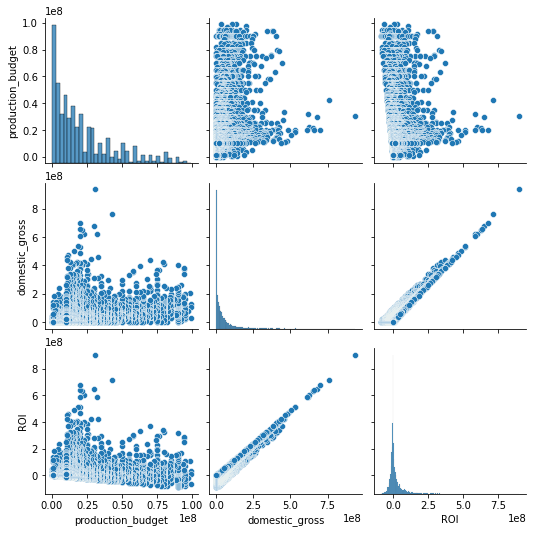

In [44]:
sns.pairplot(budgets)

The third question that needs to be asked is, what time of year do people typically see movies or what month of the year makes generates the most profit? By looking and when each movie was release and taking the average earned per month, I'll be able to see which month will increase the likelihood of having a financially successful movie.

In [45]:
#this is converting the values in 'release_date' and converting them to a string and only keeping the first three letters

budgets['release_date'] = budgets['release_date'].astype(str).str[0:3]
budgets.head()

,release_date,movie,production_budget,domestic_gross,worldwide_gross,ROI
406,Nov,The Peanuts Movie,99000000,130178411,"$250,091,610",31178411
407,Feb,The LEGO Movie 2: The Second Part,99000000,105806508,"$190,325,698",6806508
408,Nov,Robin Hood,99000000,30824628,"$84,747,441",-68175372
5326,Jun,And Then Came Love,989000,8158,"$8,158",-980842
409,May,The Mummy Returns,98000000,202007640,"$435,040,395",104007640


In [46]:
#sorting release_date from first to last

budgets.sort_values(["release_date"],
               axis = 0, ascending = True,
               inplace = True,
               na_position = "first")
budgets

,release_date,movie,production_budget,domestic_gross,worldwide_gross,ROI
4147,Apr,Bernie,6000000,9204489,"$10,106,975",3204489
1017,Apr,The Forbidden Kingdom,55000000,52075270,"$129,075,270",-2924730
3371,Apr,Johnson Family Vacation,12000000,31203964,"$31,286,759",19203964
4284,Apr,Godâs Not Dead 2,5000000,20773069,"$23,551,286",15773069
1786,Apr,The Big Wedding,32500000,21819348,"$48,425,971",-10680652
...,...,...,...,...,...,...
1415,Sep,The House with a Clock in its Walls,40000000,68549695,"$126,331,750",28549695
3330,Sep,Dancer in the Dark,12500000,4157491,"$45,557,491",-8342509
3323,Sep,Glengarry Glen Ross,12500000,10725228,"$10,725,228",-1774772
1294,Sep,Cellular,45000000,32003620,"$61,475,984",-12996380


In [47]:
#calculating mean for each month of the year

month_of_release = budgets.groupby('release_date')['domestic_gross'].mean() 
month_of_release

release_date
Apr    2.732840e+07
Aug    3.216821e+07
Dec    4.610082e+07
Feb    3.541465e+07
Jan    2.394962e+07
Jul    6.072804e+07
Jun    6.582791e+07
Mar    3.857299e+07
May    6.669795e+07
Nov    5.818117e+07
Oct    2.442350e+07
Sep    2.314989e+07
Name: domestic_gross, dtype: float64

In [48]:
#resetting index to place back into a dataframe

monthly_earning = month_of_release.reset_index()
monthly_earning

,release_date,domestic_gross
0,Apr,2.732840e+07
1,Aug,3.216821e+07
2,Dec,4.610082e+07
3,Feb,3.541465e+07
4,Jan,2.394962e+07
5,Jul,6.072804e+07
6,Jun,6.582791e+07
7,Mar,3.857299e+07
8,May,6.669795e+07
9,Nov,5.818117e+07


In [49]:
#selecting the top 5 yearing months

top_five_months = monthly_earning.nlargest(5, 'domestic_gross')
top_five_months

,release_date,domestic_gross
8,May,6.669795e+07
6,Jun,6.582791e+07
5,Jul,6.072804e+07
9,Nov,5.818117e+07
2,Dec,4.610082e+07


## Data Modeling


To best analyze this data and see what genre is the most successful at the box office, I want to use a bargraph to directly compare genre and domestic gross. After using code to determine that top five producing genres and ploting them, it's interesting to see who the top earners are. In the given dataset, each movie has one to three genre types listed, but it seems that Sci-Fi and adventure are the most common and successful. When trying to determine what will make a movie succeed, the goal is to first make a type of movie that people will enjoy the most. 

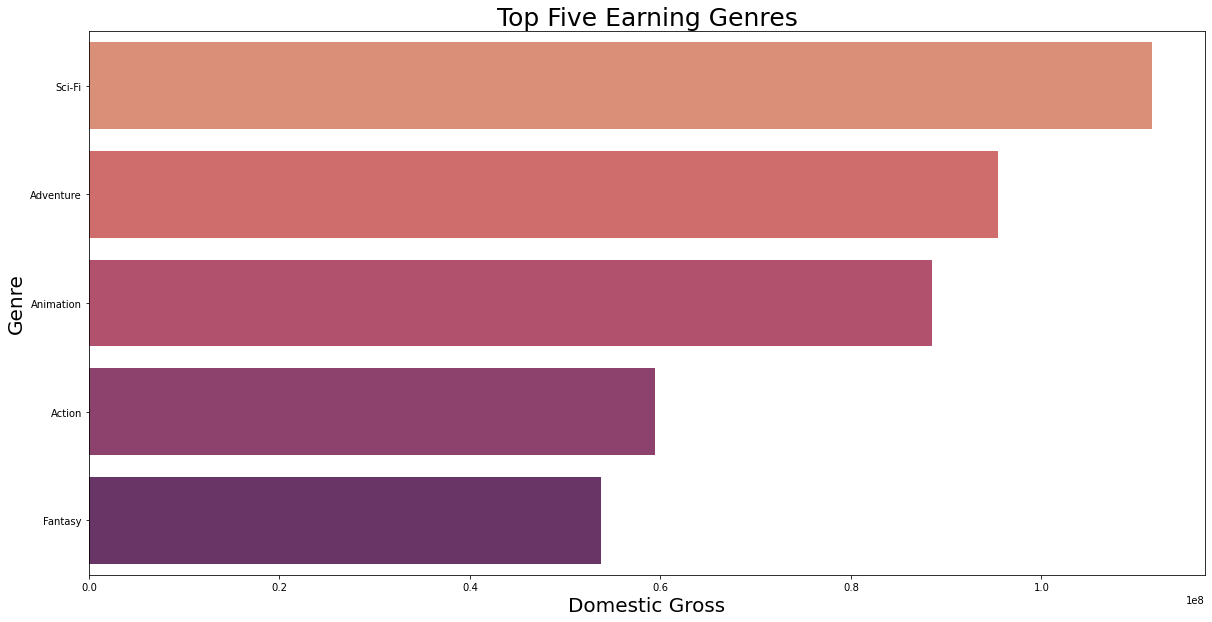

In [50]:
plt.figure(figsize=(20, 10))

sns.barplot(x=top_five_genres['domestic_gross'], 
            y=top_five_genres['genres'],
            palette='flare', 
            orient='h'
           )
plt.title('Top Five Earning Genres', fontsize=25)
plt.xlabel('Domestic Gross', fontsize=20)
plt.ylabel('Genre', fontsize=20)


plt.show()

Setting an appropriate movie budget is crucial for maximizing ROI because it can directly affect the financial success of the film. If a movie is amde with a budget that is too high, it may be difficult to recoup the costs through box office sales or other revenue streams. On the other hand, if a movie is made with a budget that is too low, the quality of the film may suffer, which could result in poor reviews and low box office sales. To determine what budget is likely to yield results I calculated Return on Investment for each movie and directly compared it to that movies production budget. From the graph you can see that budgets of 30 to 35 million produce the best results.

<Figure size 1440x720 with 0 Axes>

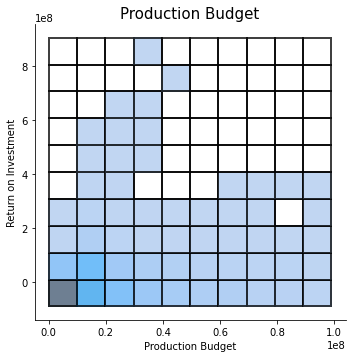

In [51]:
plt.figure(figsize=(20, 10))

sns.displot(x=budgets['production_budget'],
            y=budgets['ROI'],
            bins=10,
            alpha=0.75,
            edgecolor='black',
            
           )

plt.title('Production Budget', fontsize=15)
plt.xlabel('Production Budget', fontsize=10)
plt.ylabel('Return on Investment', fontsize=10)


plt.show()

The time of year a movie is released can be important for several reason. For example, studios often release blockbusters durng the summer months when more people have free time to go to the movies. Additionally, some movies are released during the holiday season to take advantage of the increased spending on entertainment during that time of year. But which month typically comes out on top finanically? By calculating the mean domestic gross for each month and having python choose the top five earners, this bar graph shows a near tie between May and June.

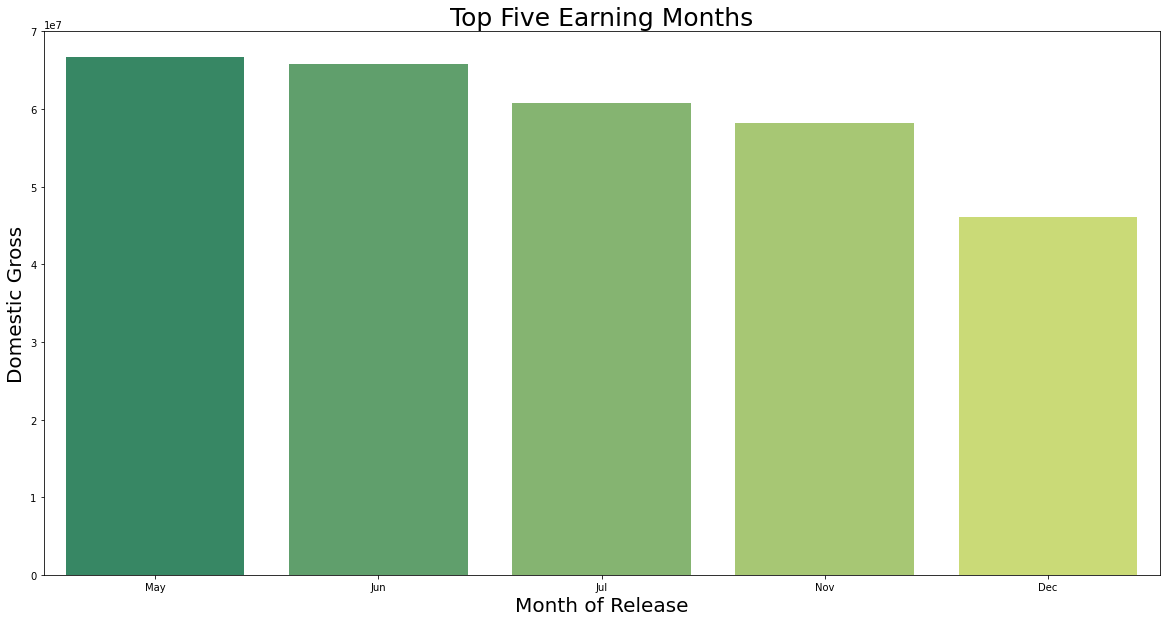

In [52]:
plt.figure(figsize=(20, 10))

sns.barplot(
    x=top_five_months['release_date'],
    y=top_five_months['domestic_gross'],
    palette='summer'
    
)


plt.title("Top Five Earning Months", fontsize=25)
plt.xlabel("Month of Release", fontsize=20)
plt.ylabel("Domestic Gross", fontsize=20)



plt.show()

## Evaluation

Genre:
From looking at this graph, Sci-Fi is the clear leader in domestic gross. In the data provided, each movie listed typically had multiple genres given, so it is possible that Sci-fi was alongside another category. But going off this data and the results from this analysis, choosing a combination of the top genres would be likely to give positive results. 

Month of Release:
There seems to be a near tie between May and June for domestic gross earned at the box office. This is aligned with what I initially predicted as kids are out of school and people have more time for entertainment. 

Production Budget: After comparing production budget to return on investment, most films spend around 10 million dollars, while not breaking even. For optimal return, it looks like movies need to spend about 40 million to earn the highest domestic gross.



## Conclusions

After completing this analysis there are three clear recommendations for making sure the film that is produced is successful:
First, creating a movie that is both classified as Sci-Fi and Adventure would ensure that it is a hit at the box office. 
Next, releasing the movie in May would generate the most profit by optimizing the maximum number of people that can go to the theaters to see it.
Lastly, to capitalize on the highest possible ROI, the budget for this film needs to be approximately 40 million dollars.


Questions to consider:

Would movie rating (PG-13, R, etc.) affect the domestic gross for each genre? Would a dataset that did not have Null values change the results? Who determines what combinations of genres a movie is?

To improve this project in the future, it would be helpful to determine what movie rating is the highest grossing and most popular. The rating could make a movie drastically different and more widely accessible if it was rated G rather than R, but would be helpful to see if on average it made it more succesful.


